# Heart Disease:

### Dataset Description:

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Attribute Information:

- age

- sex

- chest pain type (4 values)

- resting blood pressure

- serum cholestoral in mg/dl

- fasting blood sugar > 120 mg/dl

- resting electrocardiographic results (values 0,1,2)

- maximum heart rate achieved

- exercise induced angina

- oldpeak = ST depression induced by exercise relative to rest

- the slope of the peak exercise ST segment

- number of major vessels (0-3) colored by flourosopy

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

- target:0 for no presence of heart disease, 1 for presence of heart disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### EDA and Data Cleaning (If Required):

In [8]:
# Target Variable:

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

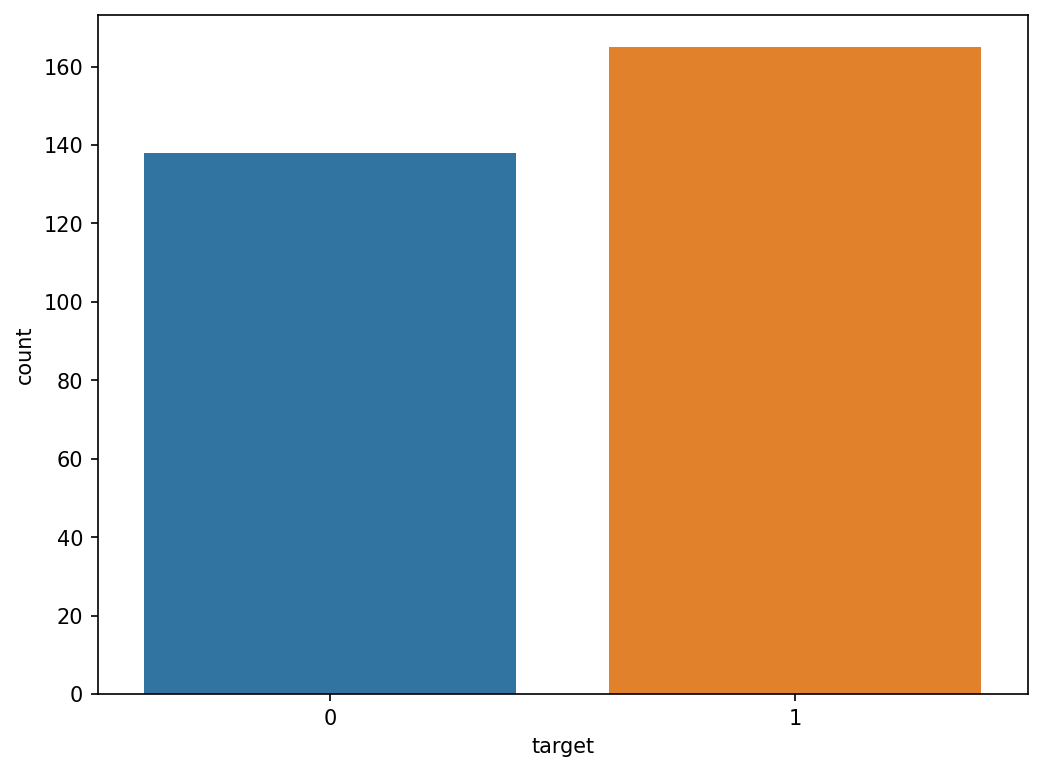

In [9]:
plt.figure(figsize=(8,6), dpi= 150)
sns.countplot(data= df, x= "target")
plt.show()

<Figure size 1200x900 with 0 Axes>

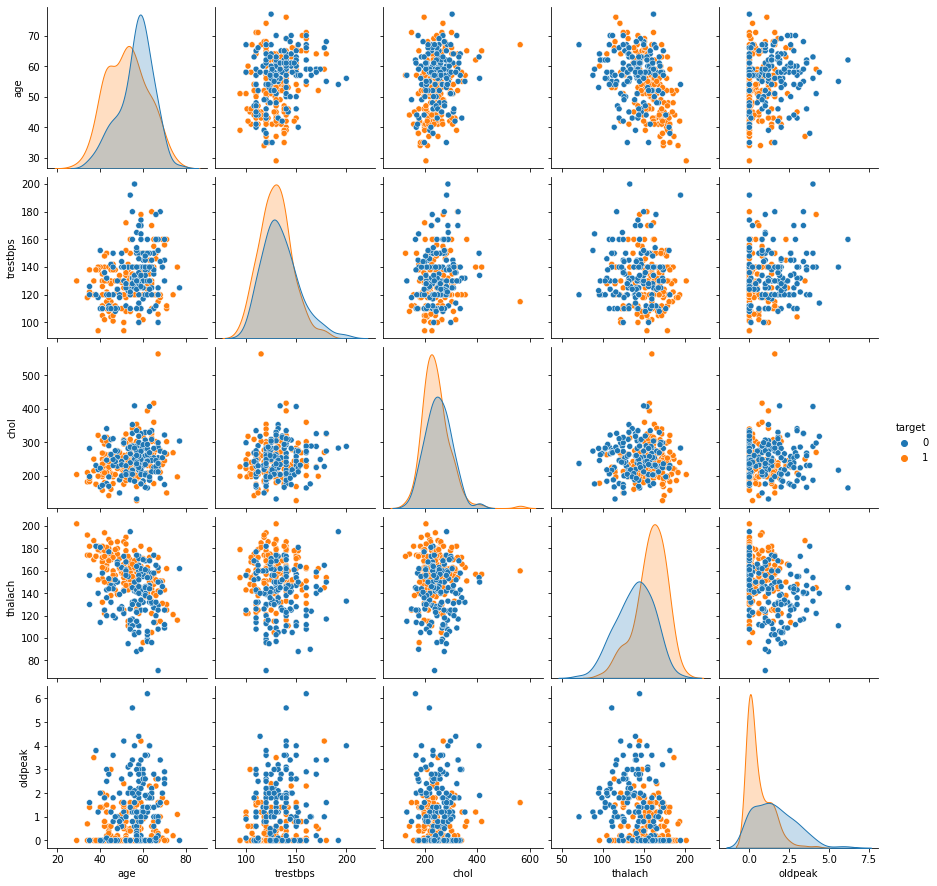

In [10]:
# Relationships Between Continuous Variables:

plt.figure(figsize=(8,6), dpi= 150)

sns.pairplot(data= df[["age","trestbps","chol","thalach","oldpeak","target"]], hue= "target")

plt.show()

In [ ]:
# There's no Visually Clear Realtionship Between any Continuous Variables.

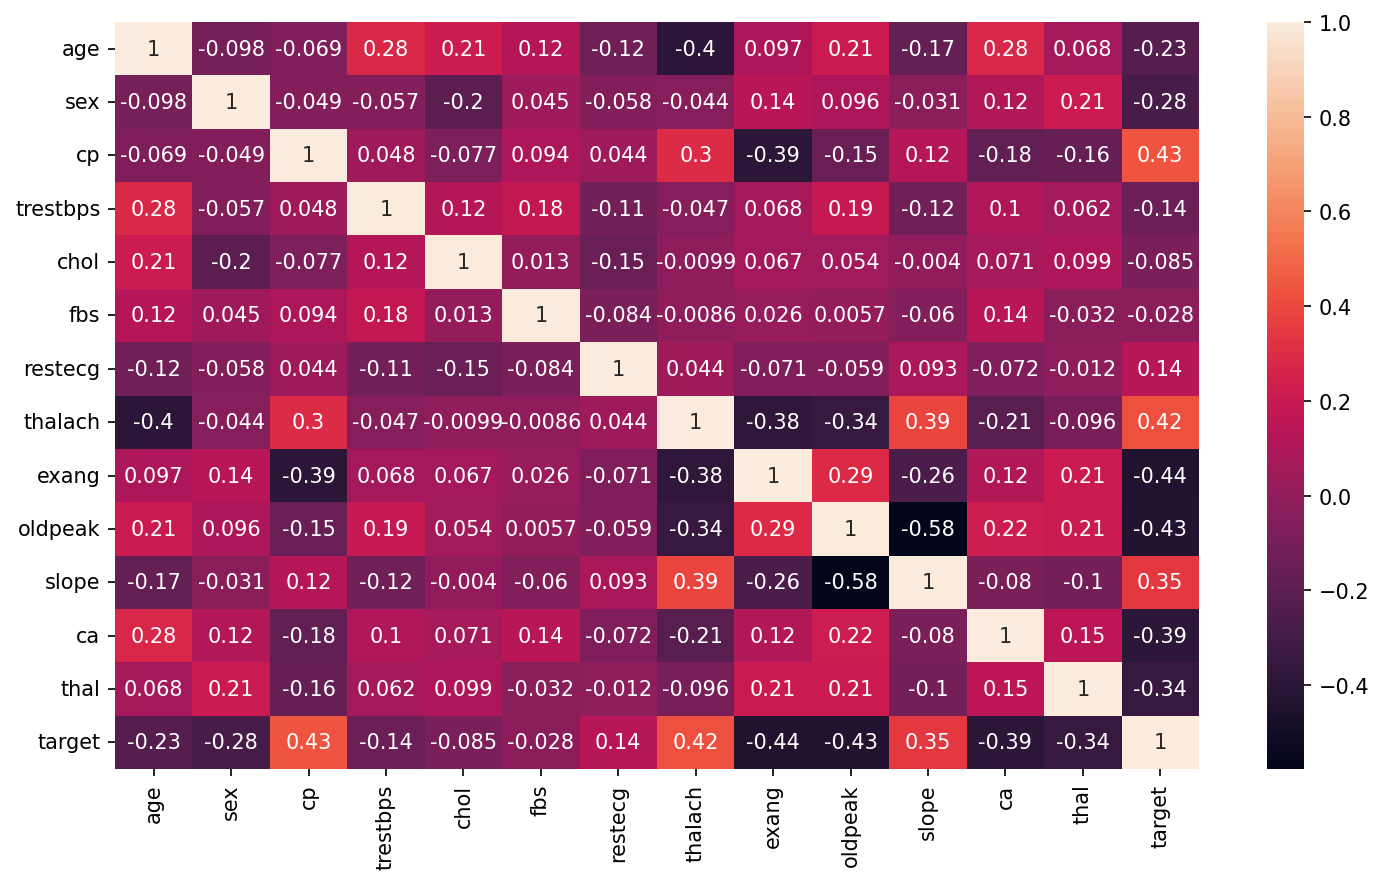

In [13]:
# Correlation Between Features and Target:

plt.figure(figsize=(10,6), dpi= 150)

sns.heatmap(data= df.corr(), annot= True)

plt.tight_layout()

plt.show()

In [14]:
# No Features have Really High or Really Low Positive or Negative Correlation with Target.

# No High Positive or Negative Correlation Between Features too.

### Train Test Split:

In [15]:
# Features:

x = df.drop("target", axis= 1)

In [16]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
# Target:

y = df["target"]

In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### Scalling:

In [21]:
sc = StandardScaler()

In [22]:
temp = sc.fit_transform(x_train)

In [23]:
x_train = pd.DataFrame(temp, columns= x_train.columns)

In [24]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
1,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
2,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
3,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
4,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480


In [25]:
temp = sc.transform(x_test)

In [26]:
x_test = pd.DataFrame(temp, columns= x_test.columns)

In [27]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.276218,0.722504,-0.971891,1.169491,0.553408,-0.383301,-1.046109,-1.708752,1.477907,-0.375556,-0.694988,0.321860,-2.196576
1,0.493954,0.722504,1.968079,2.360389,0.781172,-0.383301,-1.046109,0.398289,-0.676632,-0.739095,-0.694988,-0.689701,1.178480
2,0.276218,0.722504,0.988089,1.169491,-2.293633,2.608918,0.843133,1.025918,-0.676632,-0.739095,0.953905,0.321860,1.178480
3,0.167350,-1.384075,-0.971891,0.216773,3.077785,-0.383301,-1.046109,-0.005187,1.477907,0.805944,-0.694988,1.333421,1.178480
4,1.800367,-1.384075,0.988089,-1.212304,0.344625,2.608918,-1.046109,-0.901800,-0.676632,-0.920864,0.953905,0.321860,-0.509048


### Logistic Regression Using Logistic Regression CV:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

In [28]:
logcv_model = LogisticRegressionCV(Cs= 20, cv= 10, penalty= "elasticnet", solver= "saga", max_iter= 1000,
                                  l1_ratios= [0, 0.01, 0.1, 0.5, 0.75, 0.9, 0.99, 1])

In [29]:
logcv_model.fit(x_train, y_train)

LogisticRegressionCV(Cs=20, cv=10,
                     l1_ratios=[0, 0.01, 0.1, 0.5, 0.75, 0.9, 0.99, 1],
                     max_iter=1000, penalty='elasticnet', solver='saga')

In [30]:
logcv_model.Cs_

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [32]:
logcv_model.get_params()

{'Cs': 20,
 'class_weight': None,
 'cv': 10,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': [0, 0.01, 0.1, 0.5, 0.75, 0.9, 0.99, 1],
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0}

In [33]:
logcv_model.l1_ratio_

array([0.5])

In [34]:
logcv_model.l1_ratios

[0, 0.01, 0.1, 0.5, 0.75, 0.9, 0.99, 1]

In [45]:
logcv_model.coef_

array([[ 0.        , -0.18169515,  0.29109239,  0.        ,  0.        ,
         0.        ,  0.        ,  0.15897505, -0.26934833, -0.30653098,
         0.11042601, -0.28020775, -0.180799  ]])

### Model Evaluation:

In [47]:
pred = logcv_model.predict(x_test)

In [48]:
# Accuracy:

accuracy_score(y_test, pred)

0.8852459016393442

In [49]:
# Precision:

precision_score(y_test, pred)

0.8787878787878788

In [50]:
# Recall:

recall_score(y_test, pred)

0.90625

In [51]:
# Confusion Matrix:

confusion_matrix(y_test, pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [52]:
# Classification Report:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



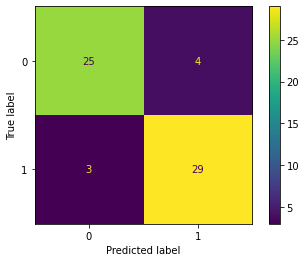

In [53]:
# Plot of Confusuion Matrix:

plot_confusion_matrix(logcv_model, x_test, y_test)
plt.show()

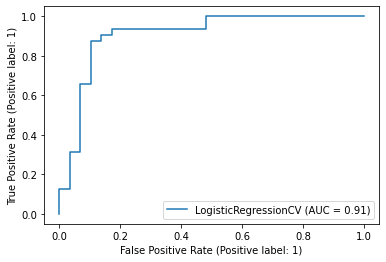

In [54]:
# ROC Curve:

plot_roc_curve(logcv_model, x_test, y_test)
plt.show()

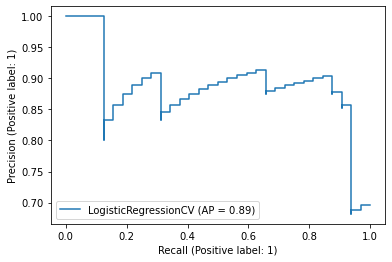

In [55]:
# Precision Recall Curve:

plot_precision_recall_curve(logcv_model, x_test, y_test)
plt.show()